In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,ward
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_mutual_info_score,adjusted_rand_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics.cluster import adjusted_mutual_info_score,adjusted_rand_score
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.mixture import GaussianMixture

In [3]:
def load_data_unbalanced(input_=['C:/Users/sushr/Downloads/train.csv/train.csv','C:/Users/sushr/Downloads/test.csv/test.csv'],
             sample_f=0.05):
    train=pd.read_csv(input_[0])
    
    if sample_f!=0:
        train=train.sample(frac=sample_f)
        
    train.loc[:, train.columns != 'id'] = train.loc[:, train.columns != 'id']\
            .astype('category').apply(lambda x: x.cat.codes)
    train.drop(['id'],axis=1,inplace=True)
    
    train_x=train.drop('target',axis=1)
    train_y=train['target']
    
  
    
    return(train_x,train_y)

In [25]:
train_x,train_y=load_data_unbalanced()

In [28]:
def load_test(data,sample_=0.10):
    if sample_!=0:
        data=data.sample(frac=sample_)
    
    data.loc[:, data.columns != 'id'] = data.loc[:, data.columns != 'id']\
            .astype('category').apply(lambda x: x.cat.codes)
    data.drop(['id'],axis=1,inplace=True)
    
    return(data)

In [29]:
## loading the test data

data=pd.read_csv('C:/Users/sushr/Downloads/test.csv/test.csv')

test_data=load_test(data)

,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
581372,561,130,144,208,704,2,3,1,7,16,45,6,5
453979,620,-1,175,62,1061,0,0,1,2,0,24,6,5
316423,-1,691,99,188,266,1,4,5,0,23,-1,1,10
390095,302,723,118,119,1422,0,4,3,0,8,44,5,2
447406,811,1350,90,178,610,2,4,1,4,15,14,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
490174,226,842,212,206,1744,0,4,3,10,23,184,4,11
37532,1197,1322,111,0,341,2,4,4,2,5,138,2,8
85910,1095,-1,53,82,1120,0,4,5,4,10,26,0,-1
292972,604,1038,45,131,1909,0,4,3,0,17,12,0,10


In [7]:
train_x=train_x.drop(columns=['nom_5','nom_6','nom_7','nom_8','nom_9','ord_5'],axis=1)

In [69]:
train_x.ord_4.value_counts()

 13    1994
 15    1915
 24    1868
 0     1826
 17    1674
 2     1657
 12    1598
 20    1578
 16    1565
 23    1550
 7     1545
 19    1444
 14    1282
 1     1259
 4     1115
 10    1095
 8      990
-1      908
 3      869
 5      806
 22     448
 25     289
 18     245
 6      165
 21     146
 9       98
 11      71
Name: ord_4, dtype: int64

## Application of Kmeans

In [9]:
# first we are applying the kmeans in train data. 
kmeans_per_k=[KMeans(n_clusters=k,random_state=42).fit(train_x) for k in range(1,25)]

inertia=[model.inertia_ for model in kmeans_per_k]

In [10]:
silh_score=[silhouette_score(train_x,model.labels_)for model in kmeans_per_k[1:]]

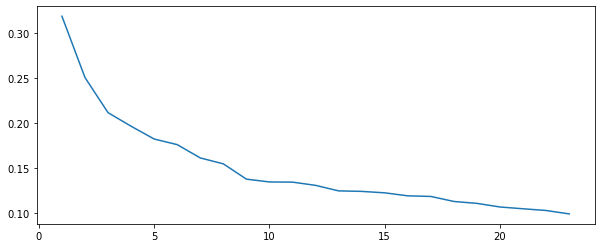

In [17]:
plt.figure(figsize=(10,4))
plt.plot(range(1,24),silh_score)

In [24]:
kmeans1=KMeans(n_clusters=8,random_state=42).fit(train_x)


In [25]:
kmeans1.predict(train_x)

array([1, 7, 6, ..., 7, 1, 2])

In [26]:
kmeans1.labels_

array([1, 7, 6, ..., 7, 1, 2])

In [27]:
homogeneity_completeness_v_measure(train_y,kmeans1.predict(train_x))

(0.039245463217789434, 0.009195398625331593, 0.014899721631381748)

In [28]:
adjusted_rand_score(train_y,kmeans1.predict(train_x))

0.006735944983626001

In [32]:
silhouette_score(train_x,kmeans1.labels_)

0.01863452136601024

## Scaling of data

In [8]:
sc=StandardScaler()
scaled=sc.fit_transform(train_x)

In [39]:
scaled

array([[-0.17286088,  1.96035408, -0.4837261 , ...,  0.64562094,
        -0.4661265 , -0.04810049],
       [-0.17286088, -0.34603528,  1.5419276 , ...,  1.02913788,
         1.41461658,  0.23160773],
       [-0.17286088, -0.34603528, -0.4837261 , ..., -0.88844682,
        -0.4661265 , -0.32780871],
       ...,
       [-0.17286088, -0.34603528,  1.5419276 , ...,  1.66833279,
         1.41461658, -1.44664157],
       [-0.17286088, -0.34603528, -0.4837261 , ...,  0.38994298,
         0.94443081, -1.44664157],
       [-0.17286088, -0.34603528, -0.4837261 , ..., -0.63276886,
        -1.87668381, -0.04810049]])

In [40]:
km_scaled=KMeans(n_clusters=8,random_state=42).fit(scaled)

In [41]:
silhouette_score(scaled,km_scaled.labels_)

0.0433699019382295

In [42]:
adjusted_rand_score(train_y,km_scaled.predict(scaled))

-0.001087745303631736

In [43]:
kmeans_per_k=[KMeans(n_clusters=k,random_state=42).fit(scaled) for k in range(1,25)]

inertia=[model.inertia_ for model in kmeans_per_k]

In [44]:
silh_score=[silhouette_score(scaled,model.labels_)for model in kmeans_per_k[1:]]

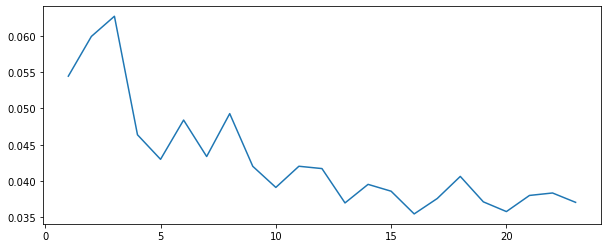

In [45]:
plt.figure(figsize=(10,4))
plt.plot(range(1,24),silh_score)

In [46]:
km_scaled_=KMeans(n_clusters=3,random_state=42).fit(scaled)

In [47]:
silhouette_score(scaled,km_scaled_.labels_)

0.05989942480531978

In [48]:
adjusted_rand_score(train_y,km_scaled_.predict(scaled))

-0.0017068086474757887

In [ ]:
## without removing the columns

In [49]:
x,y=load_data_unbalanced()

In [50]:
scaled_x=sc.fit_transform(x)

In [60]:
km_scaled_x =KMeans(n_clusters=2,random_state=0).fit(scaled_x)

In [61]:
silhouette_score(scaled_x,km_scaled_x.labels_)

0.04168931473474631

In [53]:
adjusted_rand_score(train_y,km_scaled_x.predict(scaled_x))

-0.00136507041266513

## Agglomerative

In [62]:
agg=AgglomerativeClustering(n_clusters=2).fit(scaled_x)

In [63]:
silhouette_score(scaled_x,agg.labels_)

0.08865344910303789

In [67]:
sum(agg.labels_!=train_y)

7312

In [68]:
agg=AgglomerativeClustering(n_clusters=2).fit(train_x)

In [69]:
silhouette_score(train_x,agg.labels_)

0.3177382528706767

## Gaussian mixture

In [ ]:
#unscaled data

In [73]:
gm=GaussianMixture(n_components=2).fit(train_x)

In [74]:
gm.predict(train_x)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [75]:
silhouette_score(train_x,gm.predict(train_x))

0.3095500256064953

In [ ]:
# scaled data

In [76]:
gm_=GaussianMixture(n_components=2).fit(scaled_x)

In [79]:
silhouette_score(scaled_x,gm_.predict(scaled_x))

0.043033295285702905

## Dimensionality reduction

In [9]:
pca=PCA(n_components=2)
x_trans=pca.fit_transform(train_x)

In [13]:
kmeans_pca=KMeans(n_clusters=2,random_state=42).fit(x_trans)


In [90]:
silhouette_score(x_trans,kmeans_pca.labels_)

0.4673943345829384

In [14]:
c=kmeans_pca.predict(x_trans)

In [96]:
homogeneity_completeness_v_measure(train_y,kmeans_pca.predict(x_trans))

(0.005591004675169238, 0.004001018654011253, 0.004664232609185582)

In [97]:
adjusted_rand_score(train_y,kmeans_pca.predict(x_trans))

-0.010044298607848653

In [ ]:
# scaling data after diam reduction

In [99]:
sc_pca=sc.fit_transform(x_trans)

In [100]:
kmeans_pca=KMeans(n_clusters=2,random_state=42).fit(sc_pca)


In [101]:
silhouette_score(sc_pca,kmeans_pca.labels_)

0.38492451866811117

In [ ]:
## agg after diam reduction

In [10]:
agg1=AgglomerativeClustering(n_clusters=2).fit(x_trans)

In [11]:
silhouette_score(x_trans,agg1.labels_)

0.4444082995100009

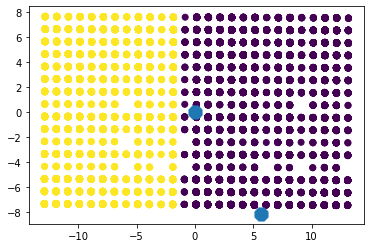

In [16]:
plt.scatter(x_trans[:,0],x_trans[:,1],c=c)

plt.scatter(kmeans_pca.cluster_centers_[0],kmeans_pca.cluster_centers_[1],marker="8",s=200)

## application of kmeans on test data

In [ ]:
pca=PCA(n_components=2)
x_trans=pca.fit_transform(train_x)

In [21]:
pipe=Pipeline([
    ('pca',PCA(n_components=2)),
    ('kmeans',KMeans(n_clusters=2,random_state=42))
])

In [26]:
pipe.fit(train_x)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=2, random_state=42))])

In [35]:
predict_=pipe.predict(test_data)

In [36]:
predict_

array([0, 0, 0, ..., 1, 0, 0])

In [37]:
silhouette_score(test_data,predict_)

0.3459638946004031